## Optimization Project
1. Aakash Dhruva (avd667) 
2. Pratyush (ps35484)
3. Aishwarya (ap63595)  
4. Ambarish (an32967)

### Problem Description  
Marketing budgets now comprise 11 percent of total company budgets, based on a CMO survey
sponsored by the Fuqua School of Business at Duke University, Deloitte LLP, and the American
Marketing Association. However, the effectiveness of marketing varies significantly: on the one hand,
P&G cut more than $100 million in digital marketing spending because their digital ads were largely
ineffective; on the other hand, Netflix plans a 54% boost in ad spending because they got very positive
feedback in international markets.  

One potential reason for such variation is the way of making marketing budget allocations. Namely, how
much to invest in each advertisement platform. As stated in the Handbook of Marketing Analytics:


...budget decisions are often based on gut feelings or on the negotiation skills of individual
managers. Consequently, politics and individual opinions tend to shape the decision process
instead of fact-based discussions. Obviously, these rules and practices bear the risk of results far
away from the optimal, profit-maximizing budget.

**Installing and Importing Libraries:**

In [1]:
import numpy as np
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

# Equation solver function

Defining a common function for simplicity to solve the given equations.

In [2]:
# The function takes name, the marketing channels, roi values, budget and upperbound values as input
def equations_solver(name, platforms, roi, budget=10000000, upperbound=3):
    model = gp.Model(name = name) # Give a unique name to the model
    
    # Decision variables
    x = {}  # Amount to invest in each platform
    
    # If upperobund is not mentioned (3rd constraint)
    if upperbound==None:
        for i, platform in enumerate(platforms):
            x[platform] = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name=platform)
    #If upperbound is mentioned (3rd constraint) e.g. $3M
    else:
        for i, platform in enumerate(platforms):
            x[platform] = model.addVar(lb=0, ub=upperbound, vtype=GRB.CONTINUOUS, name=platform)
    
    # Set objective function: Maximize ROI
    model.setObjective(gp.quicksum(roi[i] * x[platform] for i, platform in enumerate(platforms)), GRB.MAXIMIZE)
    
    # Constraints
    model.addConstr(x['Print'] + x['TV'] <= x['Facebook'] + x['Email'])
    model.addConstr(gp.quicksum(x[p] for p in ['Facebook', 'LinkedIn', 'Instagram', 'Snapchat', 'Twitter']) >= \
                    2 * gp.quicksum(x[p] for p in ['SEO', 'AdWords']))
    model.addConstr(gp.quicksum(x[platform] for platform in platforms) <= 10)
    
    # Budget constraint
    budget = budget  # $10M
    model.addConstr(gp.quicksum(x[platform] for platform in platforms) <= budget)

    model.params.OutputFlag = 0
    model.optimize()
    
    return model, x

# Q1-3

ROI - Consultancy 1

In [3]:
# Read ROI data from CSV file and set the 'Platform' column as the index
roi_data1 = pd.read_csv('ROI_data.csv', index_col='Platform')

# Extract platform names and ROI values
platforms1 = roi_data1.columns.tolist() # collecting all the marketing channel in a variable
roi_values1 = roi_data1.iloc[0].tolist() # collecting all the roi values in a variable 

# applying the equations solver function to get the gurobi model and dictionary of variables as output
model1, x1 = equations_solver('MarketingBudget1', platforms1, roi_values1)


if model1.status == GRB.OPTIMAL: # check if the solution is optimal
    print("Optimal budget allocation for all platforms (Code 1):")
    for platform in platforms1: # iterating over all the marketing channels
        print(f"{platform}: {x1[platform].x:.2f} million") # printing the optimal budget allocation
    objective_value_decimal = round(model1.objVal, 14)  # Format with 14 decimal places
    print(f"Optimal objective: {objective_value_decimal:.14f}")
else:
    print("No optimal solution found (Code 1).")


Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-22
Optimal budget allocation for all platforms (Code 1):
Print: 0.00 million
TV: 3.00 million
SEO: 0.00 million
AdWords: 1.00 million
Facebook: 0.00 million
LinkedIn: 0.00 million
Instagram: 3.00 million
Snapchat: 0.00 million
Twitter: 0.00 million
Email: 3.00 million
Optimal objective: 0.45600000000000


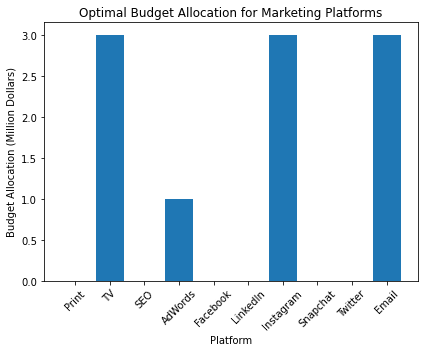

In [4]:
# plotting the optimal allocation for each marketing channel
allocations_first_firm = [x1[platform].x for platform in platforms1] 

# Defining the figure specifications
plt.figure(figsize=(6, 5))
plt.bar(platforms1, allocations_first_firm)
plt.xlabel('Platform')
plt.ylabel('Budget Allocation (Million Dollars)')
plt.title('Optimal Budget Allocation for Marketing Platforms')
plt.xticks(rotation=45)  
plt.tight_layout()


plt.show()


# Q-4


In [5]:

# Read ROI data from CSV file and set the 'Platform' column as the index
roi_data2 = pd.read_csv('ROI_data.csv', index_col='Platform')

# Extract platform names and ROI values for the second firm
platforms2 = roi_data2.columns.tolist() # collecting all the marketing channel in a variable
roi_values2 = roi_data2.iloc[1].tolist() # collecting all the roi values in a variable 

# applying the equations solver function to get the gurobi model and dictionary of variables as output
model2, x2 = equations_solver('MarketingBudget2', platforms2, roi_values2)

if model2.status == GRB.OPTIMAL: # check if the solution is optimal
    print("Optimal budget allocation for all platforms (Code 2 - Second Firm):")
    for platform in platforms2: # iterating over all the marketing channels
        print(f"{platform}: {x2[platform].x:.2f} million") # printing the optimal budget allocation
    objective_value_decimal = round(model2.objVal, 14)  # Format with 14 decimal places
    print(f"Optimal objective: {objective_value_decimal:.14f}")
else:
    print("No optimal solution found (Code 2 - Second Firm).")


Optimal budget allocation for all platforms (Code 2 - Second Firm):
Print: 3.00 million
TV: 0.00 million
SEO: 0.00 million
AdWords: 1.00 million
Facebook: 3.00 million
LinkedIn: 3.00 million
Instagram: 0.00 million
Snapchat: 0.00 million
Twitter: 0.00 million
Email: 0.00 million
Optimal objective: 0.45600000000000


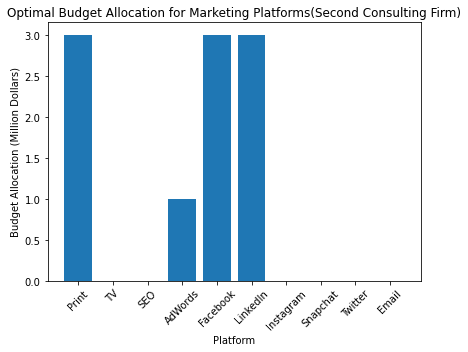

In [6]:
# plotting the optimal allocation for each marketing channel
allocations = [x2[platform].x for platform in platforms2]

# Defining the figure specifications
plt.figure(figsize=(6, 5))
plt.bar(platforms2, allocations)
plt.xlabel('Platform')
plt.ylabel('Budget Allocation (Million Dollars)')
plt.title('Optimal Budget Allocation for Marketing Platforms(Second Consulting Firm)')
plt.xticks(rotation=45)  # Rotate platform names for better visibility
plt.tight_layout()

plt.show()


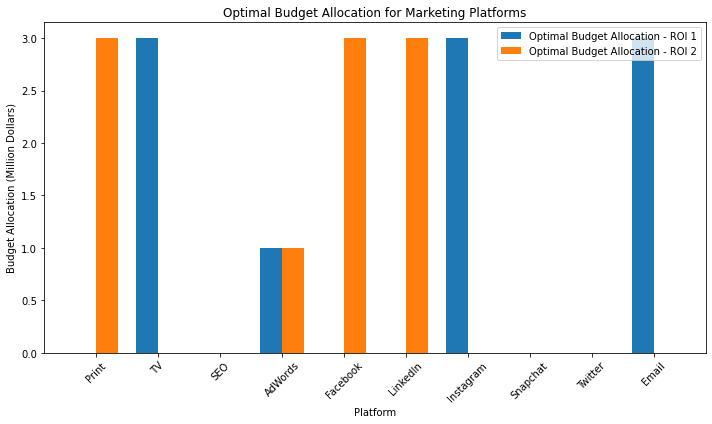

In [7]:
# plotting both allocations in a single chart for comparison

# Allocation Data for the first firm's allocation
allocations_first_firm = [x1[platform].x for platform in platforms1] 

# Allocation Data for the second firm's allocation
allocations_second_firm = [x2[platform].x for platform in platforms2] 

# Creating subplots for bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the first firm's allocation
bar_width = 0.35
bar1 = ax.bar([i - bar_width/2 for i in range(len(platforms1))], allocations_first_firm, bar_width, label='Optimal Budget Allocation - ROI 1')

# Plotting the second firm's allocation
bar2 = ax.bar([i + bar_width/2 for i in range(len(platforms1))], allocations_second_firm, bar_width, label='Optimal Budget Allocation - ROI 2')

# Setting labels and title
ax.set_xlabel('Platform')
ax.set_ylabel('Budget Allocation (Million Dollars)')
ax.set_title('Optimal Budget Allocation for Marketing Platforms')
ax.set_xticks([i for i in range(len(platforms1))])
ax.set_xticklabels(platforms1, rotation=45)

ax.legend()

plt.tight_layout()
plt.show()


# Q-5

**Are the allocations same?**

*No, the allocations are different for the ROI data provided by the two firms.*

**Considering the 1st ROI data to be correct, if we considered the recommendations from 2nd firm:**

In [8]:
roi1_true = int(np.dot(model1.Obj, model2.x) * 1000000) # Total ROI for company if 1st set of ROIs are true
print(f'Total return obtained will be: {roi1_true}; \n\
This return is lower than the return if 2nd firm\'s ROI by: {int(model2.objVal*1000000 - roi1_true)}')

Total return obtained will be: 252000; 
This return is lower than the return if 2nd firm's ROI by: 204000


**Considering the 2nd ROI data to be correct, if we considered the recommendations from 1st firm:**

In [9]:
roi2_true = int(np.dot(model2.Obj, model1.x) * 1000000) # Total ROI for company if 2nd set of ROIs are true
print(f'Total return obtained will be: {roi2_true}; \n\
This return is lower than the return if 2nd firm\'s ROI by: {int(model1.objVal*1000000 - roi2_true)}')

Total return obtained will be: 264000; 
This return is lower than the return if 2nd firm's ROI by: 192000


**Do you think the third constraint above, based on your boss’ experience, is useful?**

In [10]:
# solving linear equations without the upperbound for variables i.e. individual investment
model3, x3  = equations_solver('MarketingBudgetUnconstrained1',platforms1, roi_values1, upperbound=None)

In [11]:
# solving linear equations without the upperbound for variables i.e. individual investment
model4, x4 = equations_solver('MarketingBudgetUnconstrained2', platforms2, roi_values2, upperbound=None)

In [12]:
q5 = pd.DataFrame() # creating an empty dataframe
q5['Platforms'] = platforms1 # updating with marketing channels provided
q5['Allocation1'] = [round(x3[platform].x,2) for platform in platforms1] #updating allocations from solved model
q5['Allocation2'] = [round(x4[platform].x,2) for platform in platforms2] #updating allocations from solved model
q5

,Platforms,Allocation1,Allocation2
0,Print,0.0,5.0
1,TV,5.0,0.0
2,SEO,0.0,0.0
3,AdWords,0.0,0.0
4,Facebook,0.0,5.0
5,LinkedIn,0.0,0.0
6,Instagram,0.0,0.0
7,Snapchat,0.0,0.0
8,Twitter,0.0,0.0
9,Email,5.0,0.0


In [20]:
print(f'Total ROI with first firms allocation and without the third constraint would be: ${(model3.objVal)*1000000}\n\
Total ROI with first firms allocation and without the third constraint would be: ${(model4.objVal)*1000000}')

print(f'\nThe ROIs are greater than the ROIs with the third constraint by:\n\
First: ${round((model3.objVal)*1000000-(model1.objVal)*1000000,2)}\n\
Second: ${round((model4.objVal)*1000000-(model2.objVal)*1000000,2)}')

Total ROI with first firms allocation and without the third constraint would be: $464999.99999999994
Total ROI with first firms allocation and without the third constraint would be: $464999.99999999994

The ROIs are greater than the ROIs with the third constraint by:
First: $9000.0
Second: $9000.0


### **Therefore, the third constraint is not useful as without it there would be an increase in ROI by $9,000**

# Q-6

In [14]:
q6 = pd.DataFrame(index=platforms1) # creating a dataframe with the provided marketing channels 
q6['LowerBound_ROI1'] = [x1[platform].SAObjLow  for platform in platforms1] # updating with the lower bound of variables
q6['UpperBound_ROI1'] = [x1[platform].SAObjUp  for platform in platforms1] # updating with the upper bound of variables
q6['LowerBound_ROI2'] = [x2[platform].SAObjLow  for platform in platforms2] # updating with the lower bound of variables
q6['UpperBound_ROI2'] = [x2[platform].SAObjUp  for platform in platforms2] # updating with the upper bound of variables
q6

,LowerBound_ROI1,UpperBound_ROI1,LowerBound_ROI2,UpperBound_ROI2
Print,-inf,0.049,0.0390,0.052
TV,0.039,0.062,-inf,0.049
SEO,-inf,0.039,-inf,0.039
AdWords,0.033,0.046,0.0375,0.046
Facebook,-inf,0.029,0.0290,inf
LinkedIn,-inf,0.039,0.0390,inf
Instagram,0.039,inf,-inf,0.039
Snapchat,-inf,0.039,-inf,0.039
Twitter,-inf,0.039,-inf,0.039
Email,0.029,inf,-inf,0.029


### **The allocation in the above table can change anywhere between the lower bound and upper bound without a change in the optimal ROI that was earlier calculated i.e. \\$456,000**

# Q-7

In [15]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('roi_mat.csv')
df

,Unnamed: 0,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
1,February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
2,March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
3,April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
4,May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9
5,June,4.0,3.2,2.7,3.4,3.4,3.0,4.5,2.10,3.8,4.1
6,July,3.9,3.6,2.0,4.4,3.9,3.7,4.3,1.80,4.0,3.8
7,August,4.2,3.3,2.8,4.2,2.0,3.7,3.6,1.50,4.4,4.3
8,September,4.1,2.8,2.5,4.2,2.9,3.7,2.8,2.50,4.0,3.4
9,October,3.0,3.0,3.1,4.6,3.1,3.3,3.2,2.30,2.5,3.2


In [16]:
def optimize_monthly_budget(budget, roi_values):
    # Initialize model
    model = gp.Model()
    
    # Decision Variables
    x = model.addMVar(10, ub=3)
    
    # Objective: Maximize returns
    model.setObjective(gp.quicksum(x[j] * (roi_values[j] / 100) for j in range(10)), sense=gp.GRB.MAXIMIZE)
    
    # Constraints
    model.addConstr(gp.quicksum(x[i] for i in range(10)) <= budget)  # Total budget
    model.addConstr(x[0] + x[1] - x[4] - x[9] <= 0)                  # Print and TV vs. Facebook and Email
    model.addConstr(x[4] + x[5] + x[6] + x[7] + x[8] - 2*x[2] - 2*x[3] >= 0)  # Social Media vs. SEO and AdWords
    
    # Silence Gurobi output
    model.Params.OutputFlag = 0
    
    # Optimize
    model.optimize()
    
    # Returns for the month
    returns = sum(roi_values[j] / 100 * x[j].x for j in range(10))
    
    # Return optimized values and returns
    return list(x.x), returns

# Budget initialization
initial_budget = 10

# Lists to store results
allocation = []
returns_list = []
budgets = []

for i in range(12):
    budgets.append(initial_budget)
    
    # Optimize for the month
    x_values, returns = optimize_monthly_budget(initial_budget, list(df.iloc[i, 1:]))
    allocation.append(x_values + [returns])
    
    # Reinvest half of the returns for next month's budget
    initial_budget = 10 + 0.5 * returns
    returns_list.append(returns)

# Convert results to dataframe
columns = ['Print', 'TV', 'SEO', 'AdWords', 'Facebook', 'LinkedIn', 'Instagram', 'Snapchat', 'Twitter', 'Email', 'Returns']
df_results = pd.DataFrame(allocation, columns=columns)
df_results['Budgets'] = budgets
df_results['Month'] = df.iloc[:, 0]
df_results.set_index('Month', inplace=True)
pd.set_option('display.float_format', '{:.6f}'.format)

df_results



,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Returns,Budgets
Month,,,,,,,,,,,,
January,3.000000,0.000000,0.000000,1.333333,0.000000,0.000000,2.666667,0.000000,0.000000,3.000000,0.373000,10.000000
February,3.000000,0.000000,0.000000,2.395500,3.000000,0.000000,0.000000,0.000000,1.791000,0.000000,0.406296,10.186500
March,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,1.203148,0.000000,3.000000,0.000000,0.407516,10.203148
April,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,3.000000,0.000000,1.203758,0.000000,0.400335,10.203758
May,1.200168,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,3.000000,0.411006,10.200168
June,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.205503,3.000000,0.423809,10.205503
July,0.000000,0.000000,0.000000,3.000000,1.211905,0.000000,3.000000,0.000000,3.000000,0.000000,0.428264,10.211905
August,2.714132,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.437994,10.214132
September,0.609498,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,3.000000,0.609498,0.402712,10.218997


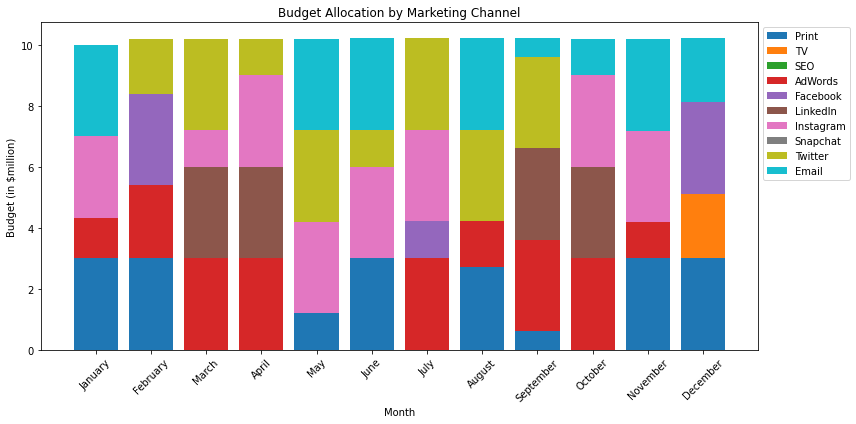

In [17]:
# Assuming you already have df_results DataFrame
# If not, please load your DataFrame here

# Extract the months and budgets
months = df_results.index
budgets = df_results['Budgets']

# Extract the budget allocation columns
marketing_channels = df_results.columns[:-2]  # Exclude 'Returns', 'Budgets', and 'Month'
allocation_data = df_results[marketing_channels]

# Create a stacked column chart
plt.figure(figsize=(12, 6))
bottom = None  # Initialize the bottom values for stacking

for channel in marketing_channels:
    plt.bar(months, allocation_data[channel], label=channel, bottom=bottom)
    if bottom is None:
        bottom = allocation_data[channel].values
    else:
        bottom += allocation_data[channel].values

plt.xlabel('Month')
plt.ylabel('Budget (in $million)')
plt.title('Budget Allocation by Marketing Channel')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Q-8

In [18]:
# Create a copy of the df_results DataFrame to store stability information
stability_df = df_results.copy()

# Calculate monthly changes in spend for each platform
budget_changes = df_results[marketing_channels].diff()

# Define a stability threshold of $1 million
stability_threshold = 1

# Check if the budget changes exceed the stability threshold
is_stable = (budget_changes.abs() <= stability_threshold)

# Replace True with 1 and False with 0 in the is_stable DataFrame
is_stable = is_stable.astype(int)

# Create new column names for the stability information
stability_column_names = [f"{channel}_S" for channel in marketing_channels]

# Add the stability information to the stability_df DataFrame
stability_df[stability_column_names] = is_stable

# Display the resulting DataFrame
stability_df


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,...,Print_S,TV_S,SEO_S,AdWords_S,Facebook_S,LinkedIn_S,Instagram_S,Snapchat_S,Twitter_S,Email_S
Month,,,,,,,,,,,,,,,,,,,,,
January,3.000000,0.000000,0.000000,1.333333,0.000000,0.000000,2.666667,0.000000,0.000000,3.000000,...,0,0,0,0,0,0,0,0,0,0
February,3.000000,0.000000,0.000000,2.395500,3.000000,0.000000,0.000000,0.000000,1.791000,0.000000,...,1,1,1,0,0,1,0,1,0,0
March,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,1.203148,0.000000,3.000000,0.000000,...,0,1,1,1,0,0,0,1,0,1
April,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,3.000000,0.000000,1.203758,0.000000,...,1,1,1,1,1,1,0,1,0,1
May,1.200168,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,3.000000,...,0,1,1,0,1,0,1,1,0,0
June,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.205503,3.000000,...,0,1,1,1,1,1,1,1,0,1
July,0.000000,0.000000,0.000000,3.000000,1.211905,0.000000,3.000000,0.000000,3.000000,0.000000,...,0,1,1,0,0,1,1,1,0,0
August,2.714132,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,...,0,1,1,0,0,1,0,1,1,0
September,0.609498,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,3.000000,0.609498,...,0,1,1,0,1,0,1,1,1,0


### Visualizing unstability of the first marketing channel

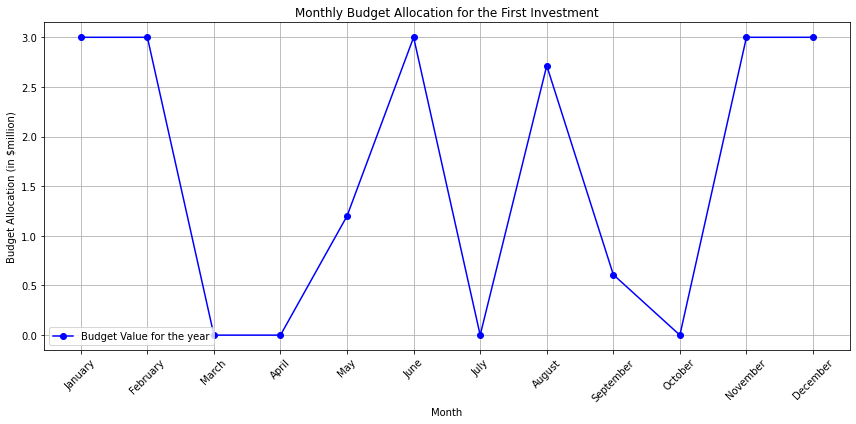

In [19]:
# Extract the first column of stability_df
column_to_visualize = stability_df.iloc[:, 0]

# Create a line graph
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(column_to_visualize.index, column_to_visualize.values, marker='o', linestyle='-', color='b', label='Budget Value for the year')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Budget Allocation (in $million)')
plt.title('Monthly Budget Allocation for the First Investment')

# Add a legend
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.grid(True)

plt.show()


**Is the allocation you found stable?**

Given this table, the allocation found is not stable since there are multiple instances across various platforms where the month-to-month change exceeds $1M

**Describe how my might model this?**

A more stable budget could be achieved by reducing the individual marketing channel investment, however due to this the overall ROI for the company may either decrease or remain the same. A more stable investments could be achieved by:

1. **Introduce Change Variables:** 
    -  For each platform $i$ and each month $t$ (except the first month), we introduce variables $\\Delta x_{i, t}\$, which represent the change in allocation from the previous month to the current month.
    
    \$\Delta x_{i, t} = x_{i, t} - x_{i, t-1}, \quad \text{for } i = 0, 1, 2, \ldots, 9 \text{ and } t = 2, 3, 4, \ldots, 12\$
    
    Here, \$x_{i, t}\$ represents the monthly budget allocation for platform $i$ in month $i$, and \$x_{i, t-1}\$ represents the allocation for the same platform in the previous month \$t-1\$.
  
2. **Constraints on Change Amount:** 
    - We add constraints to bound the change variables $\Delta x_{i, t}\$ to ensure that the absolute month-to-month change in allocation does not exceed \\$1 million for any platform \$i\$.
    
    \$ \Delta x_{i, t} \leq 1, \quad \text{for } i = 0, 1, 2, \ldots, 9 \text{ and } t = 2, 3, 4, \ldots, 12 \$
    
    Here, \$\Delta x_{i, t}\$ represents the change in allocation from the previous month \$t-1\$ to the current month \$t\$ for platform \$i\$, and we ensure that it is limited to be less than or equal to \\$1 million.

